In [58]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [59]:
df = pd.read_csv("https://raw.githubusercontent.com/danielvieira95/Intelig-ncia-Artificial-e-Big-Data--2-2024/refs/heads/master/Bases%20de%20dados/dados_produtos.csv")

In [60]:
df.head()

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [61]:
dic = {
    'product_name': 'Produto','rating':'Avaliação','rating_count': 'Quantidade de avaliações', 'purchased':'Comprou'
}

In [62]:
df.rename(columns = dic, inplace = True)

In [63]:
df.head()

,Produto,Avaliação,Quantidade de avaliações,Comprou
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Produto                   100 non-null    object 
 1   Avaliação                 100 non-null    float64
 2   Quantidade de avaliações  100 non-null    int64  
 3   Comprou                   100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [65]:
df.describe

<bound method NDFrame.describe of       Produto  Avaliação  Quantidade de avaliações  Comprou
0   Televisão       3.04                        29        1
1     Celular       3.46                      3872        0
2   Cafeteira       3.25                      1187        0
3   Televisão       3.77                      4097        1
4   Videogame       5.00                      4738        1
..        ...        ...                       ...      ...
95       iPod       4.44                      1372        0
96    Celular       4.66                      1690        1
97  Televisão       4.33                      3364        1
98   Notebook       3.30                      1825        1
99       iPod       4.08                       533        0

[100 rows x 4 columns]>

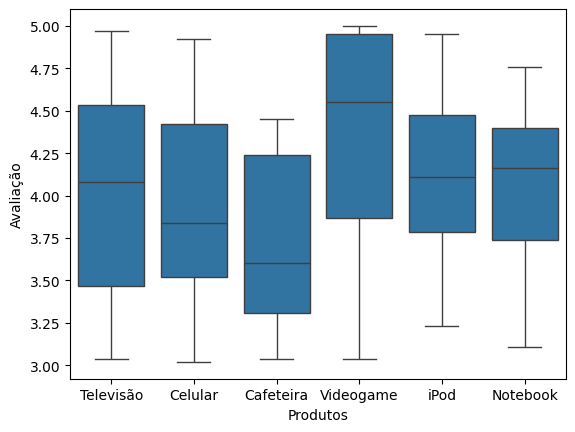

In [66]:
sns.boxplot(x='Produto', y='Avaliação', data=df)
plt.xlabel('Produtos')
plt.ylabel('Avaliação')
plt.show()

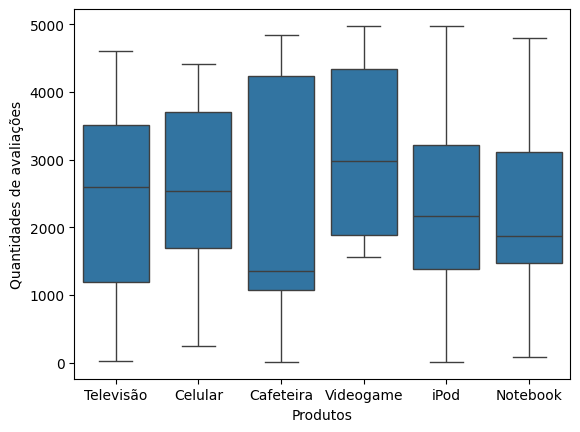

In [67]:
sns.boxplot(x='Produto', y='Quantidade de avaliações', data=df)
plt.xlabel('Produtos')
plt.ylabel('Quantidades de avaliações')
plt.show()

In [68]:
df = df.dropna()

In [69]:
algoritmo = DecisionTreeClassifier()

In [70]:
produtos = df['Produto'].unique()

In [71]:
sc = StandardScaler()

In [72]:
from scipy import stats

In [73]:
mediaqtd = df.groupby('Produto')['Quantidade de avaliações'].mean()
mediaav = df.groupby('Produto')['Avaliação'].mean()

modas = df.groupby('Produto')['Comprou'].apply(lambda x: x.mode().iloc[0])

modas

,Comprou
Produto,
Cafeteira,0
Celular,1
Notebook,1
Televisão,1
Videogame,1
iPod,0


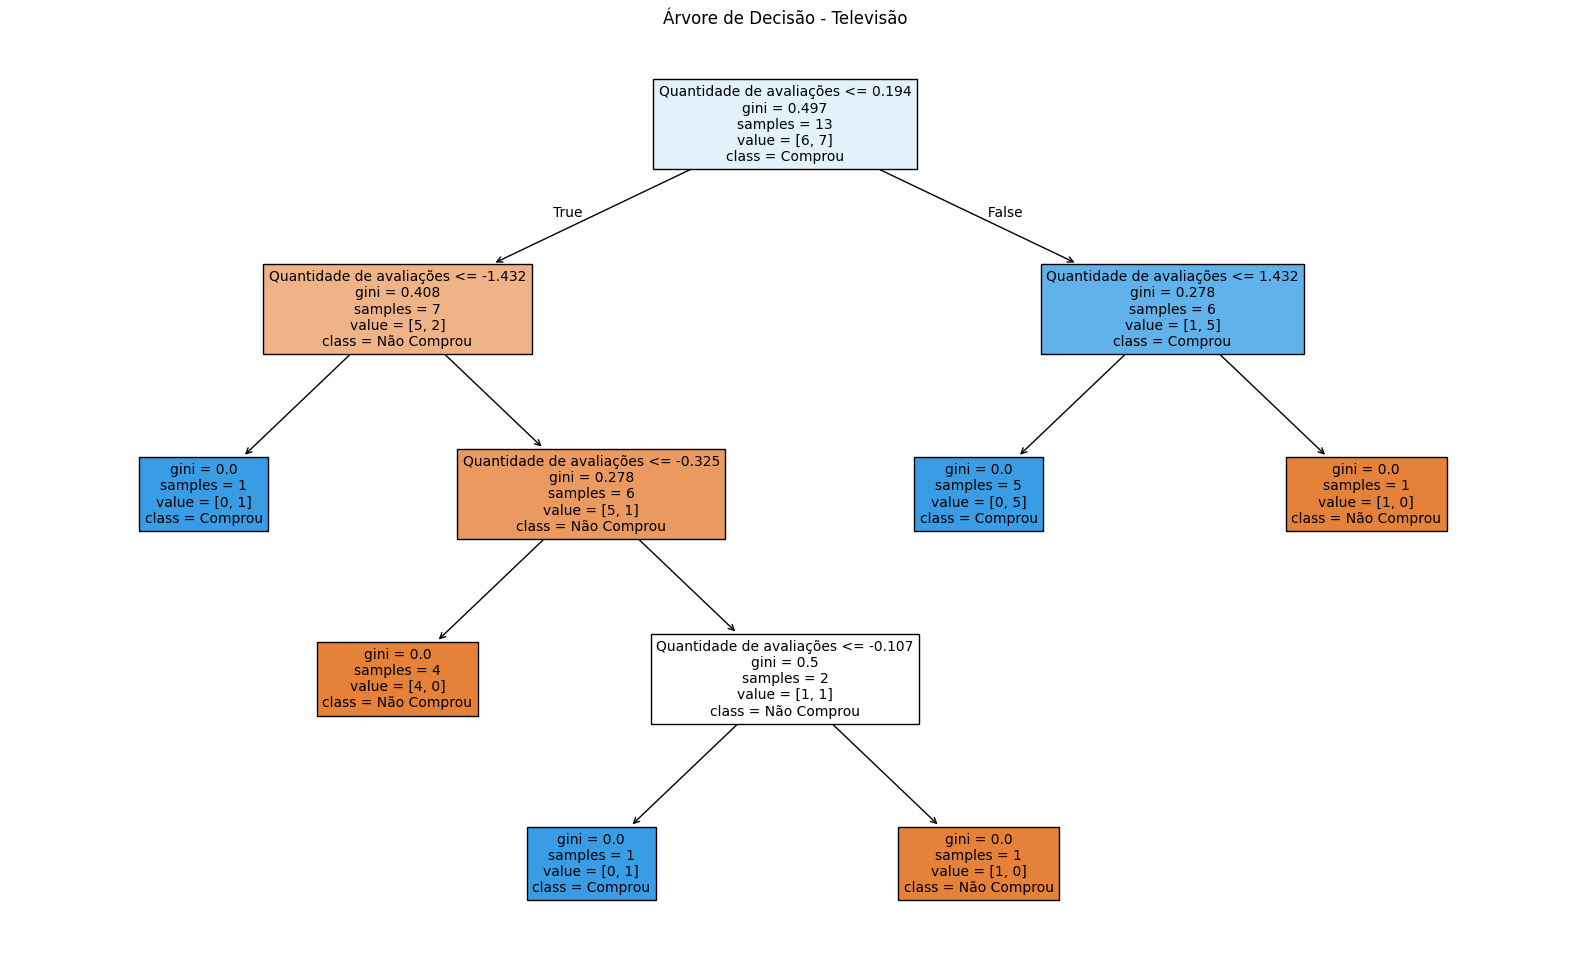

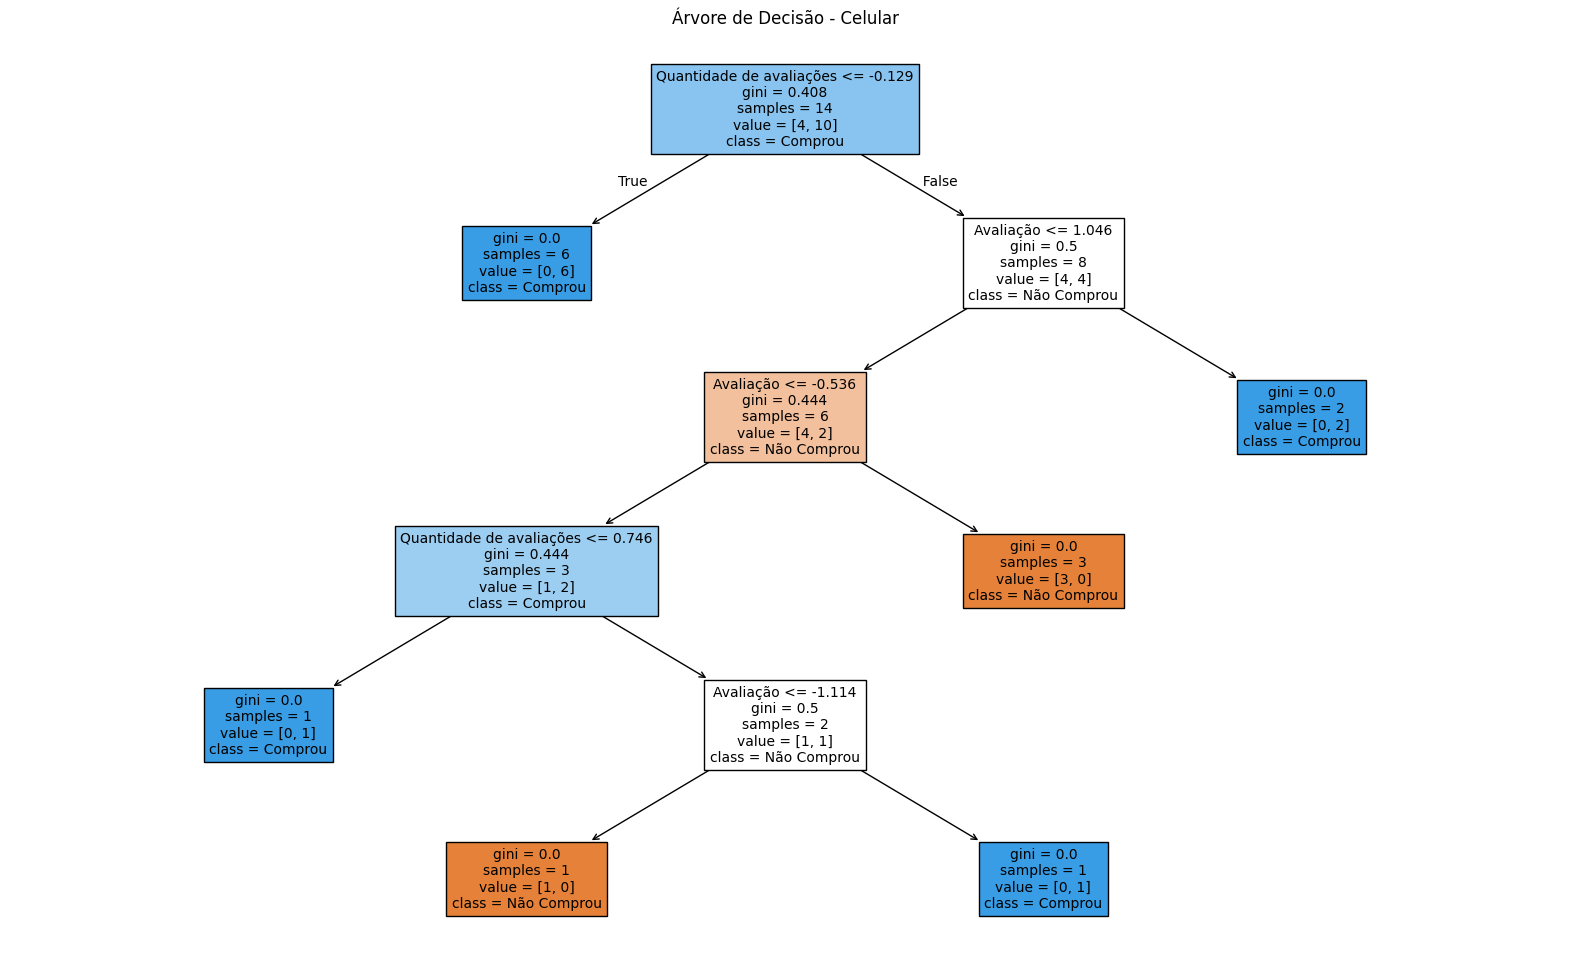

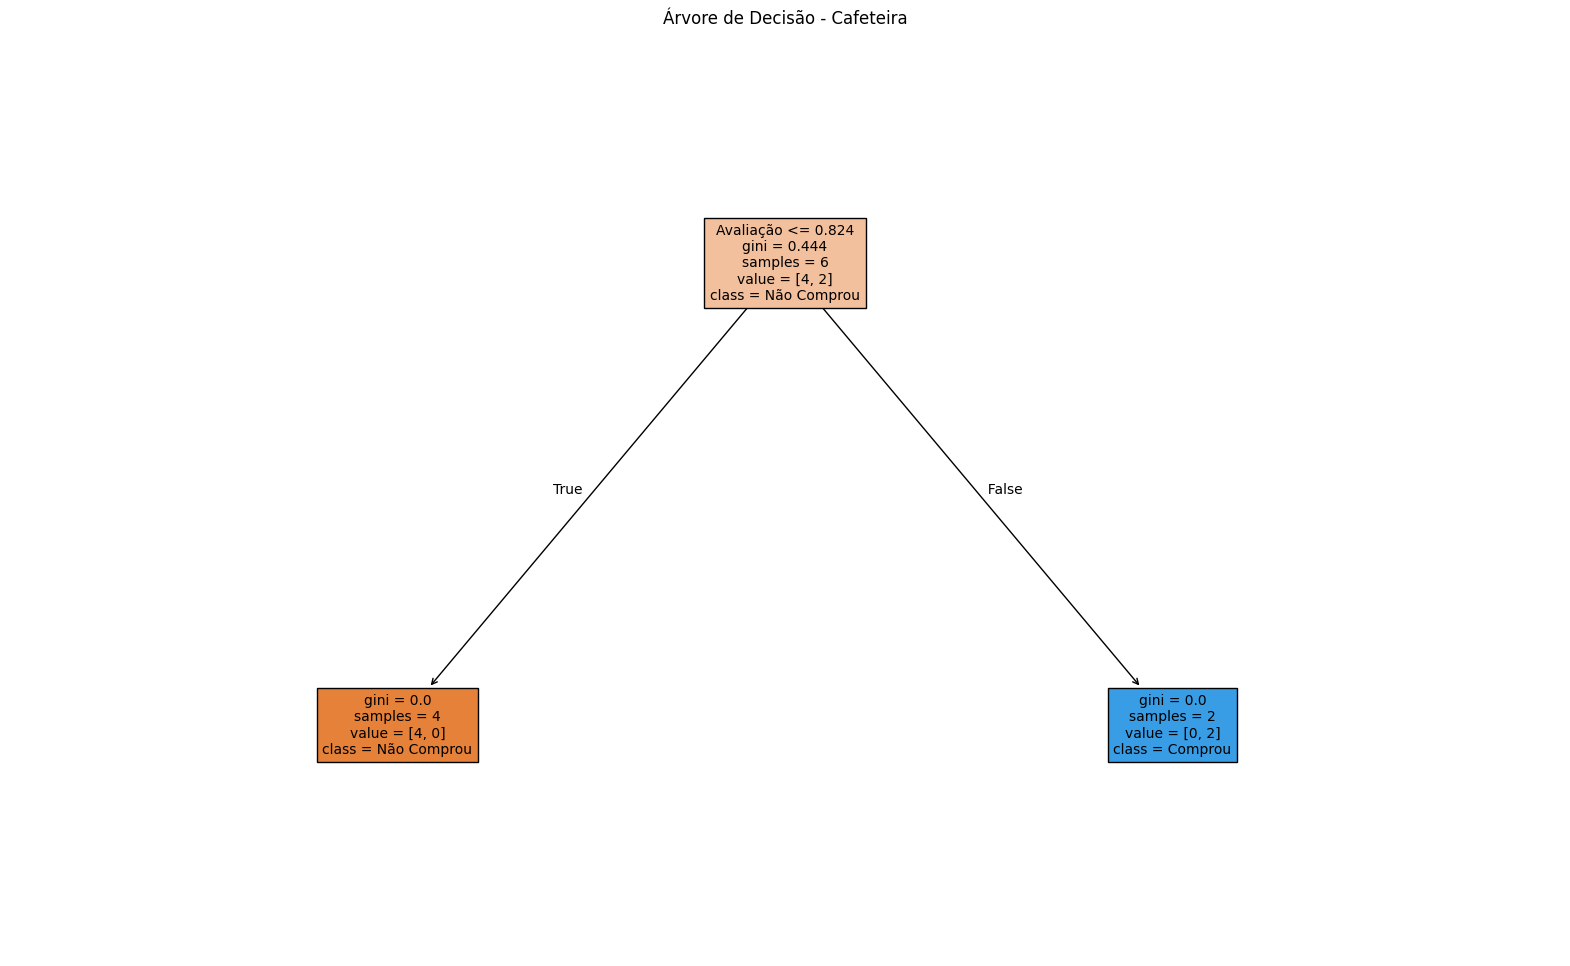

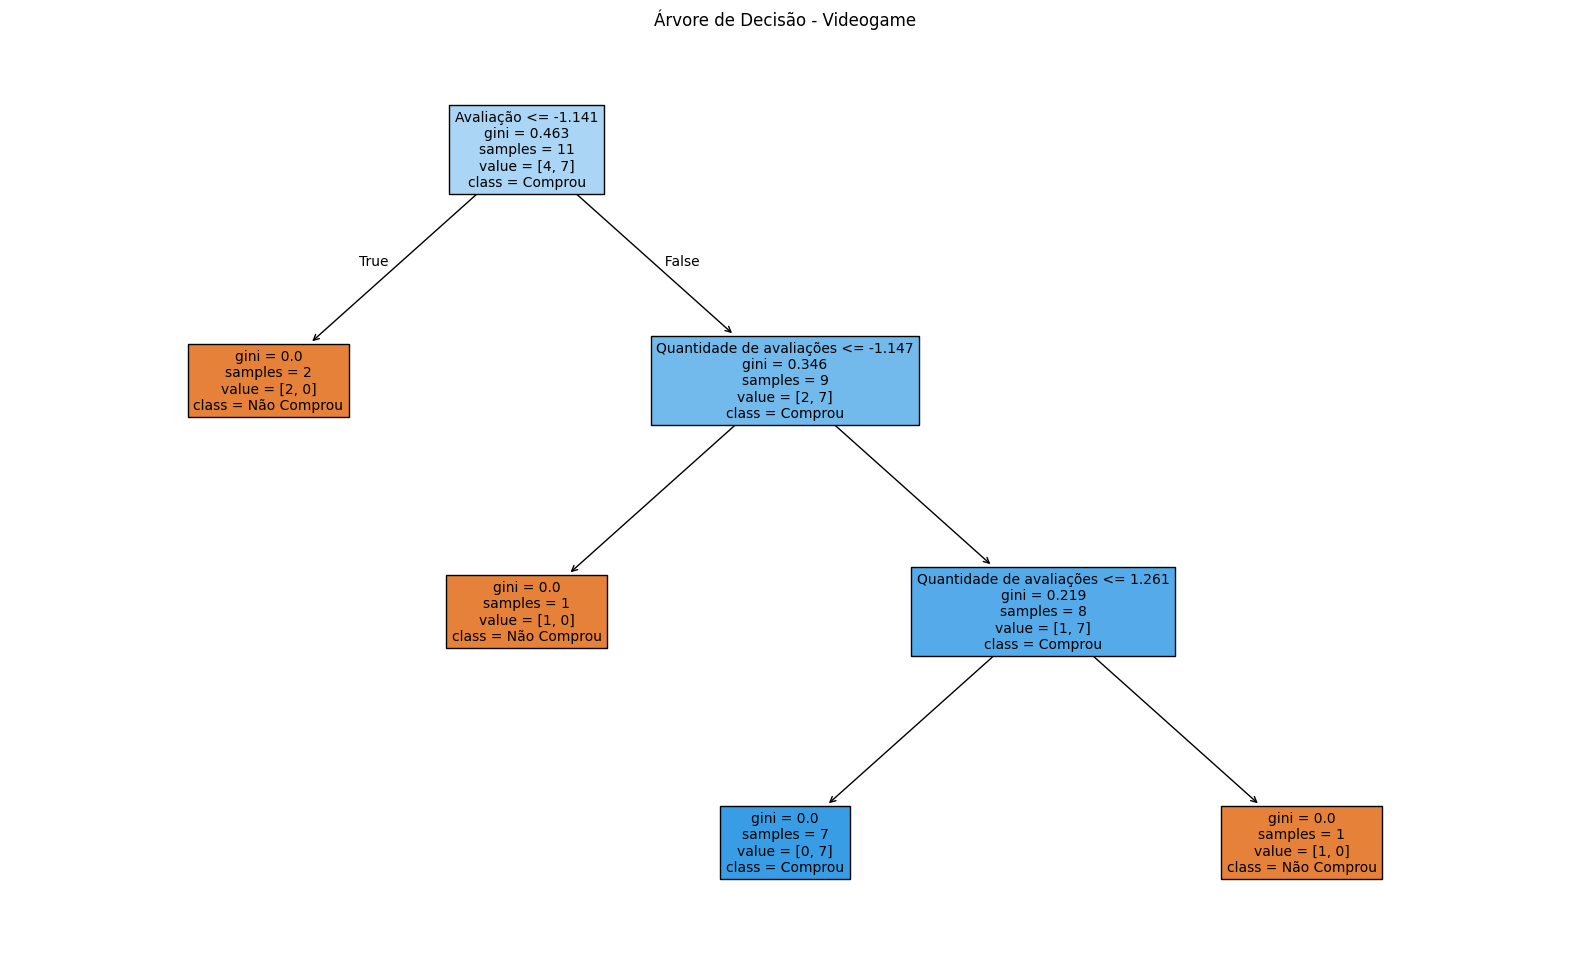

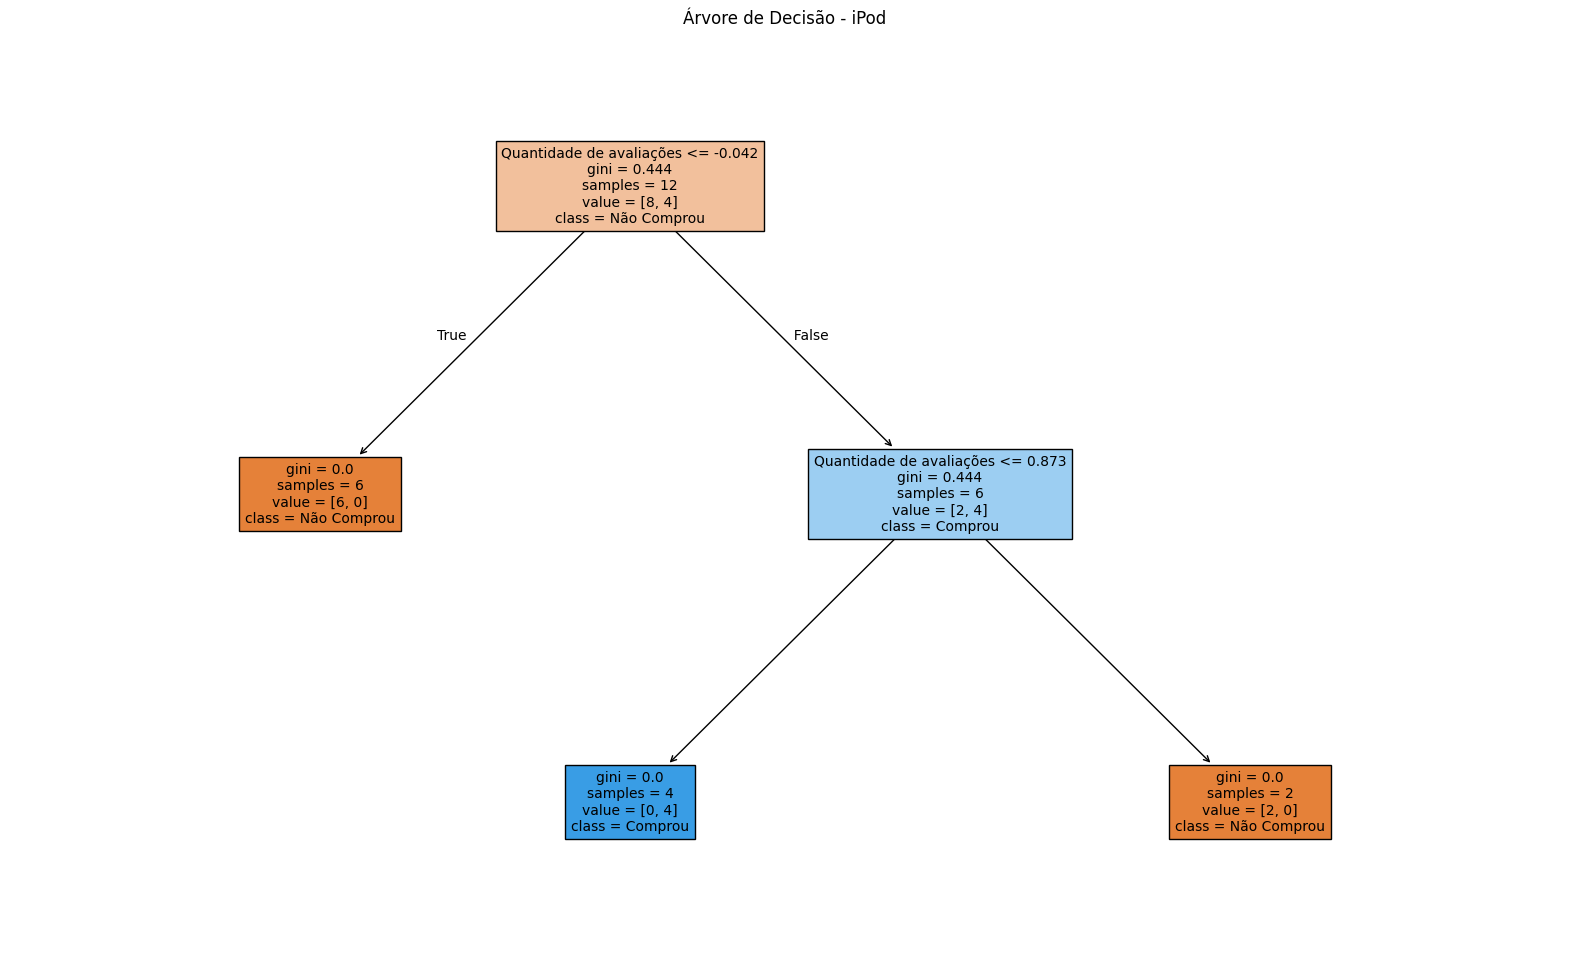

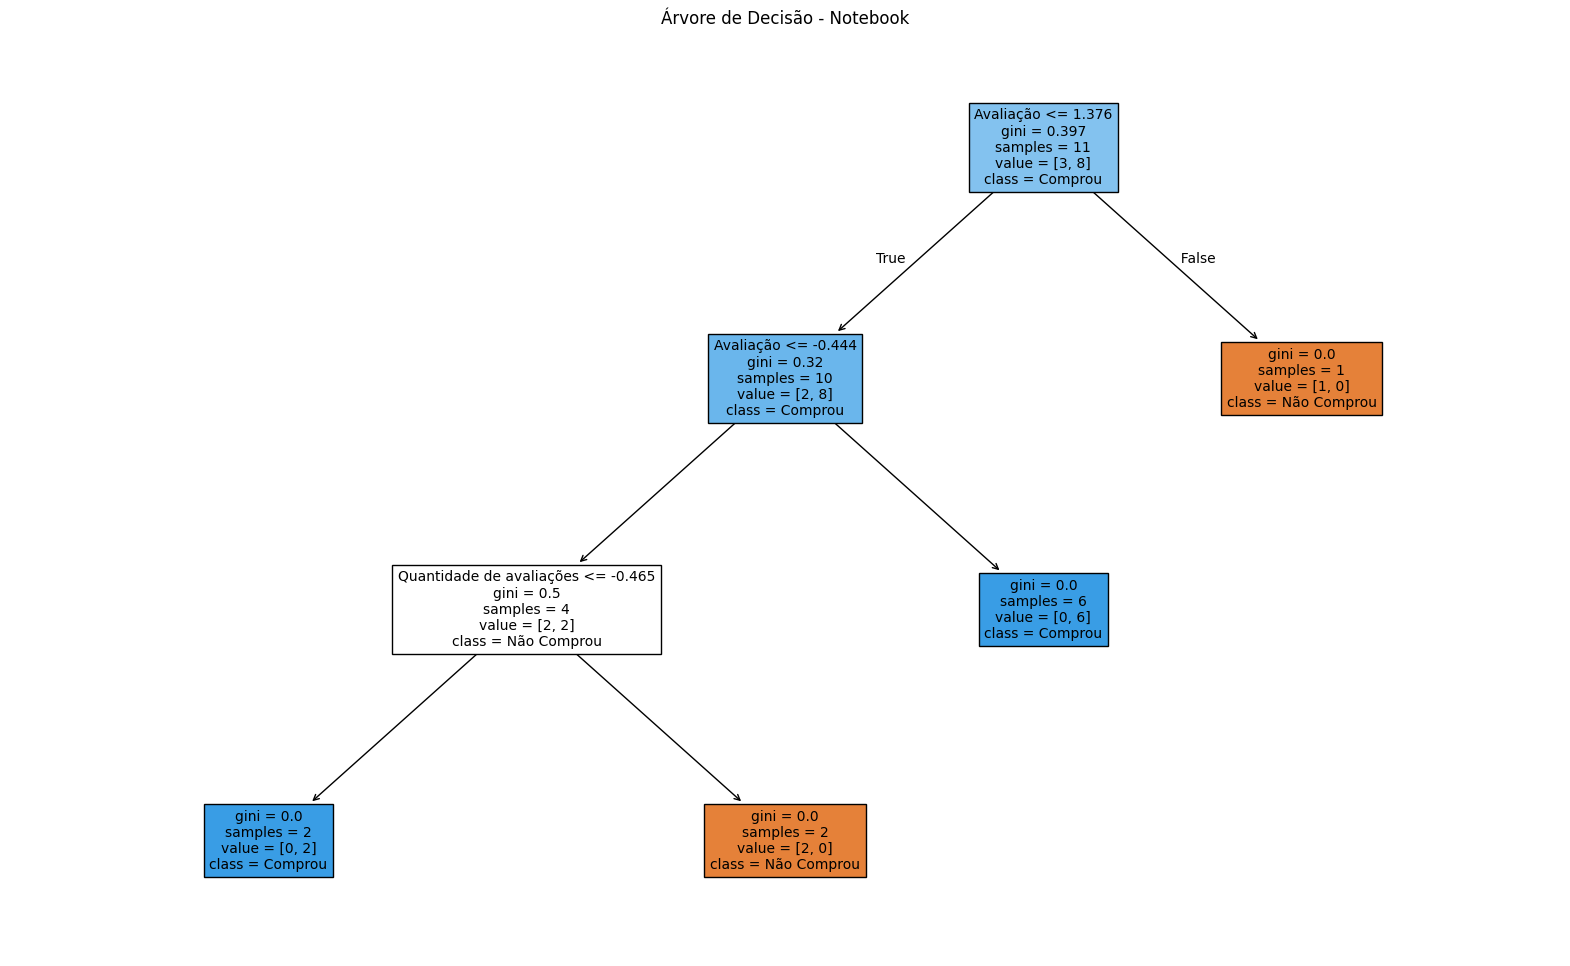

In [74]:
for produto in produtos:
    df_produto = df[df['Produto'] == produto].copy()
    X_deste_produto = df_produto[['Avaliação', 'Quantidade de avaliações']].values
    Y_deste_produto = df_produto['Comprou'].values

    X_treino, X_teste, Y_treino, Y_teste = train_test_split(X_deste_produto, Y_deste_produto, test_size=0.3, random_state=42)
    X_treino = sc.fit_transform(X_treino)
    X_teste = sc.transform(X_teste)
    algoritmo.fit(X_treino, Y_treino)


    plt.figure(figsize=(20, 12))
    tree.plot_tree(algoritmo,
                    feature_names=['Avaliação', 'Quantidade de avaliações'],
                    class_names=['Não Comprou', 'Comprou'],
                    filled=True,
                    fontsize=10)
    plt.title(f'Árvore de Decisão - {produto}')
    plt.show()

In [78]:


print("Métricas por produto")

for produto in produtos:
    df_produto = df[df['Produto'] == produto].copy()
    X_produto_data = df_produto[['Avaliação', 'Quantidade de avaliações']].values
    Y_produto_data = df_produto['Comprou'].values

    X_produto_scaled = sc.transform(X_produto_data)
    Y_pred_produto = algoritmo.predict(X_produto_scaled)

    accuracy = accuracy_score(Y_produto_data, Y_pred_produto)
    precision = precision_score(Y_produto_data, Y_pred_produto, zero_division=1)
    recall = recall_score(Y_produto_data, Y_pred_produto, zero_division=1)
    f1 = f1_score(Y_produto_data, Y_pred_produto, zero_division=1)
    cm = confusion_matrix(Y_produto_data, Y_pred_produto)

    print(f"Metricas de: {produto}:")
    print(f"   Amostras: {X_produto_data.shape[0]}")
    print(f"   Accuracy: {accuracy}")
    print(f"   Precision: {precision}")
    print(f"   Recall: {recall}")
    print(f"   F1 Score: {f1}")
    print("   Confusion Matrix:")
    print(cm)
    print("-" * 30)

Métricas por produto
Metricas de: Televisão:
   Amostras: 19
   Accuracy: 0.3684210526315789
   Precision: 0.45454545454545453
   Recall: 0.45454545454545453
   F1 Score: 0.45454545454545453
   Confusion Matrix:
[[2 6]
 [6 5]]
------------------------------
Metricas de: Celular:
   Amostras: 21
   Accuracy: 0.38095238095238093
   Precision: 0.5
   Recall: 0.3076923076923077
   F1 Score: 0.38095238095238093
   Confusion Matrix:
[[4 4]
 [9 4]]
------------------------------
Metricas de: Cafeteira:
   Amostras: 9
   Accuracy: 0.3333333333333333
   Precision: 0.2857142857142857
   Recall: 0.6666666666666666
   F1 Score: 0.4
   Confusion Matrix:
[[1 5]
 [1 2]]
------------------------------
Metricas de: Videogame:
   Amostras: 17
   Accuracy: 0.5294117647058824
   Precision: 0.8
   Recall: 0.36363636363636365
   F1 Score: 0.5
   Confusion Matrix:
[[5 1]
 [7 4]]
------------------------------
Metricas de: iPod:
   Amostras: 18
   Accuracy: 0.3888888888888889
   Precision: 0.3333333333333333


In [79]:
"""Com base nas métricas acima, os modelos de árvore de decisão apresentam níveis variados de eficácia para diferentes produtos.
Embora o recall seja consistentemente alto (1.0 para a maioria dos produtos), indicando que os modelos são bons em identificar todas as compras reais,
os scores de precisão e acurácia são mais baixos, sugerindo que os modelos também preveem compras incorretamente para não-compras.
Portanto, os modelos são eficazes em identificar compradores em potencial, mas têm uma taxa significativa de falsos positivos."""

'Com base nas métricas acima, os modelos de árvore de decisão apresentam níveis variados de eficácia para diferentes produtos.\nEmbora o recall seja consistentemente alto (1.0 para a maioria dos produtos), indicando que os modelos são bons em identificar todas as compras reais,\nos scores de precisão e acurácia são mais baixos, sugerindo que os modelos também preveem compras incorretamente para não-compras.\nPortanto, os modelos são eficazes em identificar compradores em potencial, mas têm uma taxa significativa de falsos positivos.'